This notebook looks at the COVID-19 Cases from Toronto Public Health since the first case was reported in January 2020
- This project is an exploratory analysis 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [45]:
data = pd.read_csv("Data/COVID19_cases_Toronto.csv")

In [46]:
data.head(10)

,_id,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,44294,Sporadic,50-59,Malvern,M1B,Institutional,CONFIRMED,2020-03-25,2020-03-27,MALE,RESOLVED,No,No,No,No,No,No
1,44295,Sporadic,20-29,Malvern,M1B,Community,CONFIRMED,2020-03-20,2020-03-28,MALE,RESOLVED,No,No,No,Yes,No,No
2,44296,Sporadic,60-69,Malvern,M1B,Travel,CONFIRMED,2020-03-04,2020-03-08,FEMALE,RESOLVED,No,No,No,Yes,Yes,Yes
3,44297,Outbreak Associated,50-59,Rouge,M1B,N/A - Outbreak associated,CONFIRMED,2020-05-02,2020-05-04,FEMALE,RESOLVED,No,No,No,No,No,No
4,44298,Sporadic,30-39,Rouge,M1B,Close contact,CONFIRMED,2020-05-31,2020-06-06,FEMALE,RESOLVED,No,No,No,No,No,No
5,44299,Sporadic,20-29,Rouge,M1B,Close contact,CONFIRMED,2020-06-01,2020-06-06,MALE,RESOLVED,No,No,No,No,No,No
6,44300,Sporadic,60-69,Rouge,M1B,Community,CONFIRMED,2020-05-22,2020-06-01,MALE,RESOLVED,No,No,No,No,No,No
7,44301,Sporadic,30-39,Rouge,M1B,Close contact,PROBABLE,2020-05-26,2020-06-02,MALE,RESOLVED,No,No,No,No,No,No
8,44302,Sporadic,30-39,Malvern,M1B,Close contact,CONFIRMED,2020-05-11,2020-05-16,MALE,RESOLVED,No,No,No,No,No,No
9,44303,Sporadic,19 and younger,Malvern,M1B,Close contact,PROBABLE,2020-06-06,2020-06-09,MALE,RESOLVED,No,No,No,No,No,No


In [47]:
data.dtypes

_id                        int64
Outbreak Associated       object
Age Group                 object
Neighbourhood Name        object
FSA                       object
Source of Infection       object
Classification            object
Episode Date              object
Reported Date             object
Client Gender             object
Outcome                   object
Currently Hospitalized    object
Currently in ICU          object
Currently Intubated       object
Ever Hospitalized         object
Ever in ICU               object
Ever Intubated            object
dtype: object

In [5]:
#change date columns from object to datetime 
data["Episode Date"] = pd.to_datetime(data["Episode Date"])
data["Reported Date"] = pd.to_datetime(data["Reported Date"])
data.dtypes

_id                                int64
Outbreak Associated               object
Age Group                         object
Neighbourhood Name                object
FSA                               object
Source of Infection               object
Classification                    object
Episode Date              datetime64[ns]
Reported Date             datetime64[ns]
Client Gender                     object
Outcome                           object
Currently Hospitalized            object
Currently in ICU                  object
Currently Intubated               object
Ever Hospitalized                 object
Ever in ICU                       object
Ever Intubated                    object
dtype: object

In [6]:
not_null_counts = data.isnull().sum()
print(not_null_counts)

_id                         0
Outbreak Associated         0
Age Group                  32
Neighbourhood Name        613
FSA                       567
Source of Infection         0
Classification              0
Episode Date                0
Reported Date               0
Client Gender               0
Outcome                     0
Currently Hospitalized      0
Currently in ICU            0
Currently Intubated         0
Ever Hospitalized           0
Ever in ICU                 0
Ever Intubated              0
dtype: int64


In [7]:
male_count = (data['Client Gender'] == 'MALE').sum()
female_count = (data['Client Gender'] == 'FEMALE').sum()
percentage_male = male_count/(female_count + male_count)
percentage_female = 1 - percentage_male

# Print the results:
#Male
print("Male Count:", male_count)
print("Male Percentage: ", percentage_male)
#Female
print("Female Count:", female_count)
print("Female percentage: ", percentage_female)

Male Count: 6747
Male Percentage:  0.4603575327510917
Female Count: 7909
Female percentage:  0.5396424672489083


In [8]:
#look at the OUTCOME column 
outcome = data['Outcome']
resolved = outcome == 'RESOLVED'
fatal = outcome == 'FATAL'
active = outcome == 'ACTIVE'

resolved_count = resolved.sum()
print('resolved: ', resolved_count)
fatal_count = fatal.sum()
print("fatal: ", fatal_count)
active_count = active.sum()
print('active: ', active_count)




resolved:  13195
fatal:  1121
active:  595


In [9]:
#create a histogram plot function with count()
def histogram_chart(column, #which column of the dataset
                    x_label, #input x name
                    y_label, #input y name
                    chart_title, #input chart title
                    sort #do you want to sort the values yes or no input only
                    ):
    if sort == 'yes' or 'Yes' or 'YES':
        plt.figure(figsize = (8, 6))
        data[column].value_counts().sort_index().plot(kind = "bar", color = "skyblue", edgecolor = "black")
        plt.xlabel(f"{x_label}")
        plt.ylabel(f"{y_label}")
        plt.title(f"{chart_title}")
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize = (8, 6))
        data[column].value_counts().plot(kind = "bar", color = "skyblue", edgecolor = "black")
        plt.xlabel(f"{x_label}")
        plt.ylabel(f"{y_label}")
        plt.title(f"{chart_title}")
        plt.tight_layout()
        plt.show()


In [52]:
#function to get the count number for each unique in data['']
def unique_count(data, source):
    unique_values = data[source].unique()
    count_dict = {}
    for value in unique_values:
        count = (data[source] == value).sum()
        count_dict[value] = count
    return count_dict

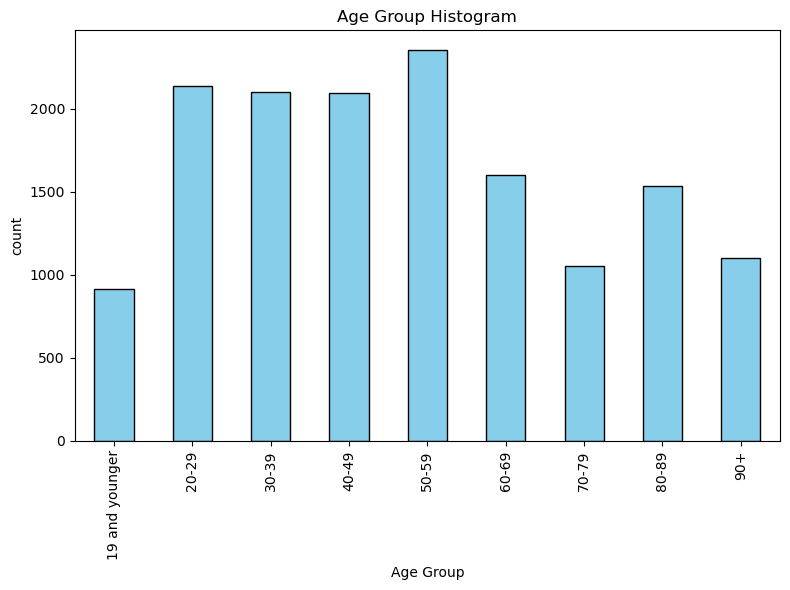

{'50-59': 2354,
 '20-29': 2135,
 '60-69': 1598,
 '30-39': 2101,
 '19 and younger': 915,
 '80-89': 1531,
 '70-79': 1052,
 '40-49': 2095,
 nan: 0,
 '90+': 1098}

In [53]:
histogram_chart('Age Group', 'Age Group', 'count', 'Age Group Histogram', 'yes')
unique_count(data, 'Age Group')

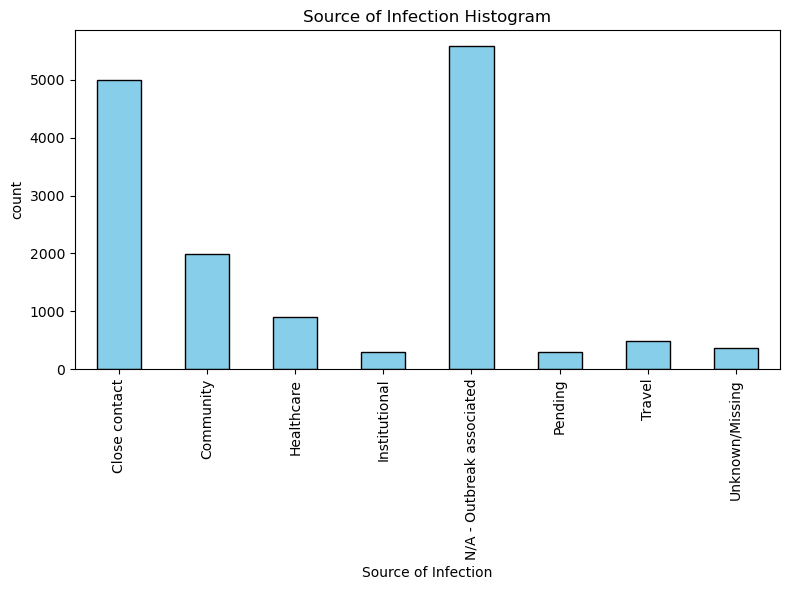

{'Institutional': 301, 'Community': 1991, 'Travel': 488, 'N/A - Outbreak associated': 5578, 'Close contact': 4998, 'Pending': 294, 'Healthcare': 897, 'Unknown/Missing': 364}


In [54]:
histogram_chart('Source of Infection', 'Source of Infection', 'count', 'Source of Infection Histogram', 'yes')
result = unique_count(data, 'Source of Infection')
print(result)